<h3><b>Structure of this folder</h3>

In [248]:

import os
import glob

print(os.listdir("../signal_processing"))
print(os.listdir("../signal_processing/wav_files"))


['freq_tables.png', 'final_project.ipynb', '.ipynb_checkpoints', '.git', 'Final Project.pdf', 'wav_files']
['trumpet-G3.wav', 'trumpet-C5.wav', 'instrument.wav', 'trumpet.wav', 'piano-C5.wav']


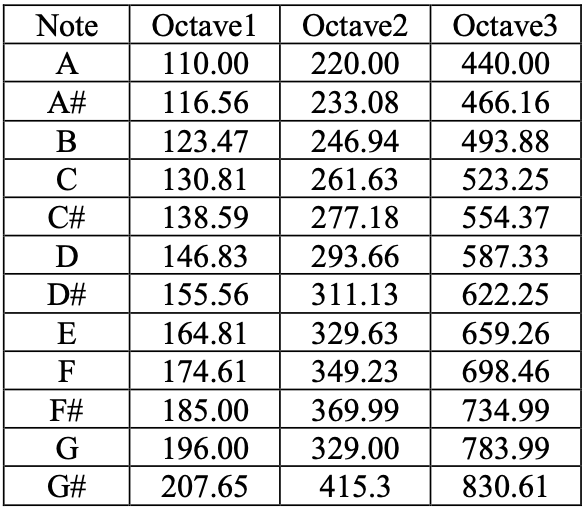

In [249]:

from IPython.display import Image

Image(filename='freq_tables.png', width=300, height=300)

In [250]:


from tabulate import tabulate

notes = ['A', 'A#', 'B', 'C', 'C#', 'D', 'D#', 'E', 'F', 'F#', 'G', 'G#']
octaves = [1, 2, 3]
frequencies = [[110, 116.56, 123.47, 130.81, 138.59, 146.83, 155.56, 164.81, 174.61, 185, 196, 207.65],
                   [220, 233.08, 246.94, 261.63, 277.18, 293.66, 311.13, 329.63, 349.23, 369.99, 392, 415.30],
                   [440, 466.16, 493.88, 523.25, 554.37, 587.33, 622.25, 659.26, 698.46, 739.99, 783.99, 830.61]]
table = tabulate(frequencies, headers=notes, showindex=octaves, tablefmt="fancy_grid")
print(table)


╒════╤═════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╤════════╕
│    │   A │     A# │      B │      C │     C# │      D │     D# │      E │      F │     F# │      G │     G# │
╞════╪═════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╪════════╡
│  1 │ 110 │ 116.56 │ 123.47 │ 130.81 │ 138.59 │ 146.83 │ 155.56 │ 164.81 │ 174.61 │ 185    │ 196    │ 207.65 │
├────┼─────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│  2 │ 220 │ 233.08 │ 246.94 │ 261.63 │ 277.18 │ 293.66 │ 311.13 │ 329.63 │ 349.23 │ 369.99 │ 392    │ 415.3  │
├────┼─────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┼────────┤
│  3 │ 440 │ 466.16 │ 493.88 │ 523.25 │ 554.37 │ 587.33 │ 622.25 │ 659.26 │ 698.46 │ 739.99 │ 783.99 │ 830.61 │
╘════╧═════╧════════╧════════╧════════╧════════╧════════╧════════╧════════╧════════╧════════╧════════╧══

<h3><b>Assignment 1.</b>Write program that for given input (wav file) prints the matching note name.</h3>

In [251]:
import math
import numpy as np
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavfile
from scipy.fftpack import fft, fftfreq

def find_note(wav_file):
    rate, data = wavfile.read(wav_file)

    # Compute the Fourier transform of the sample data
    fourier = fft(data)

    # And the power (sig_fft is of complex dtype)
    power = np.abs(fourier)

    # The corresponding frequencies 
    sample_freq = fftfreq(data.size, d=1/rate)

    # Find the peak in the coefficients
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]
    
    if "trumpet" in wav_file:
        peak_freq = freqs[power[pos_mask].argmax()] / 2
    elif "piano" in wav_file:
        peak_freq = freqs[power[pos_mask].argmax()]
    else:
        return "Error: wav file not found"
    
    print("Frequency of the note is {} Hz".format(peak_freq))

    # Find the note
    for i in range(len(frequencies)):
        for j in range(len(frequencies[i])):
            if abs(frequencies[i][j] - peak_freq) < 5:
                return notes[j] + str(octaves[i] + 2) 
    return "Note not found"
    

<h3>1-a.</h3>

In [252]:
print(find_note('wav_files/trumpet-G3.wav'))
print(find_note('wav_files/piano-C5.wav'))
print(find_note('wav_files/trumpet-C5.wav'))


Frequency of the note is 195.63127090301003 Hz
G3
Frequency of the note is 523.6177215189873 Hz
C5
Frequency of the note is 523.6053068167499 Hz
C5


<h3><b>1-b.</h3>

In [253]:
print(find_note('wav_files/trumpet.wav'))

Frequency of the note is 783.121525019857 Hz
G5


<h3><b>Assignment 2.</b>Write program that for a given input (wav file) prints the matching instrument (piano or trumpet).</h3>

In [258]:
from scipy.io import wavfile

def match_instrument(wav_file):
    # Read the wav file
    rate, data = wavfile.read(wav_file)
    
    # Detect the pitch frequency using the scipy library
    rate, data = wavfile.read(wav_file)

    # Compute the Fourier transform of the sample data
    fourier = fft(data)

    # And the power (sig_fft is of complex dtype)
    power = np.abs(fourier)

    # The corresponding frequencies 
    sample_freq = fftfreq(data.size, d=1/rate)

    # Find the peak in the coefficients
    pos_mask = np.where(sample_freq > 0)
    freqs = sample_freq[pos_mask]

    peak_freq = freqs[power[pos_mask].argmax()] / 2
    
    # Define the frequency ranges for each instrument
    piano_range = [100, 500]
    trumpet_range = [500, 1000]
    
    
    # Match the pitch frequency to an instrument
    if piano_range[0] <= peak_freq <= piano_range[1]:
        return "piano"
    elif trumpet_range[0] <= peak_freq <= trumpet_range[1]:
        return "trumpet"
    else:
        return "Error: wav file not found"

<h3><b>1-a.</h3>

In [259]:
print(match_instrument('wav_files/trumpet-C5.wav'))
print(match_instrument('wav_files/piano-C5.wav'))

trumpet
piano


<h3><b>1-b.</h3>

In [260]:
print(match_instrument('wav_files/instrument.wav'))

piano
